In [129]:
import numpy as np
import pandas as pd

def toBinary(number, maxSize):
    mask = 1
#     arr = np.zeros(maxSize, dtype=int)
    arr = [0 for i in range(maxSize)]
    shifts = 0
    while mask <= number:
#         print(mask)
        x = 1 if number & mask > 0 else 0
        arr[shifts] = x
        mask = mask << 1
        shifts += 1
    return arr

def createDataset(maxSize, factor, minInt, maxInt):
    df = pd.DataFrame()
    for i in range(minInt, maxInt):
        arr = toBinary(i, maxSize)
        arr.append(1 if i%factor==0 else 0)
        df = df.append(pd.Series(arr), ignore_index=True)
    return df
bits = 15
factor = 7
maxInt = 2**bits-1
df = createDataset(bits, factor, 0, maxInt)
df.head(14)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
import tensorflow as tf
from tensorflow import keras

train = df.iloc[:,0:bits]
labels = df[bits]

model = keras.Sequential([keras.layers.Dense(bits, activation=tf.nn.relu, input_shape=(bits,)),
                          keras.layers.Dense(bits, activation=tf.nn.relu, input_shape=(bits,)),
                          keras.layers.Dense(2, activation=tf.nn.softmax)])

model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train, labels, epochs=100, validation_split=0.1)

Train on 29490 samples, validate on 3277 samples
Epoch 1/100
29490/29490 [==============================] - 1s 41us/step - loss: 0.4258 - acc: 0.8531 - val_loss: 0.4143 - val_acc: 0.8572
Epoch 2/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.4133 - acc: 0.8571 - val_loss: 0.4113 - val_acc: 0.8572
Epoch 3/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.4125 - acc: 0.8571 - val_loss: 0.4129 - val_acc: 0.8572
Epoch 4/100
29490/29490 [==============================] - 1s 33us/step - loss: 0.4118 - acc: 0.8571 - val_loss: 0.4125 - val_acc: 0.8572
Epoch 5/100
29490/29490 [==============================] - 1s 34us/step - loss: 0.4115 - acc: 0.8571 - val_loss: 0.4109 - val_acc: 0.8572
Epoch 6/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.4109 - acc: 0.8571 - val_loss: 0.4099 - val_acc: 0.8572
Epoch 7/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.4104 - acc: 0.8571 - val_loss: 0.4099 - v

29490/29490 [==============================] - 1s 34us/step - loss: 0.0116 - acc: 0.9977 - val_loss: 0.0056 - val_acc: 0.9994
Epoch 60/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 0.0057 - val_acc: 0.9994
Epoch 61/100
29490/29490 [==============================] - 1s 34us/step - loss: 0.0122 - acc: 0.9974 - val_loss: 0.0050 - val_acc: 0.9994
Epoch 62/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.0102 - acc: 0.9978 - val_loss: 0.0053 - val_acc: 0.9994
Epoch 63/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.0098 - acc: 0.9977 - val_loss: 0.0049 - val_acc: 0.9994
Epoch 64/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.0098 - acc: 0.9977 - val_loss: 0.0067 - val_acc: 0.9994
Epoch 65/100
29490/29490 [==============================] - 1s 35us/step - loss: 0.0094 - acc: 0.9977 - val_loss: 0.0044 - val_acc: 0.9994
Epoch 66/100
29490/29490 [==============

In [131]:
# pd.DataFrame(toBinary(6, 11)).T
arr = np.array([toBinary(49, 11)])
arr
df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


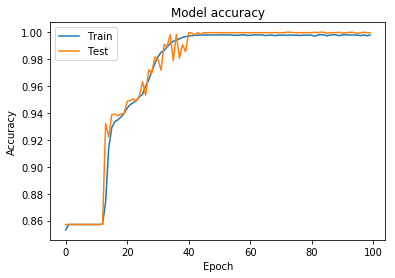

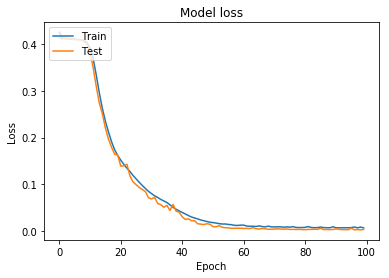

In [133]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [135]:
model.predict(np.array([toBinary(77, bits)])), model.predict(np.array([toBinary(70, bits)]))

(array([[4.3380985e-04, 9.9956614e-01]], dtype=float32),
 array([[9.1586611e-05, 9.9990845e-01]], dtype=float32))